In [2]:
x <- "Hello World"
x

[1] "Hello World"

In [1]:
library(R2jags)
library(MCMCvis)
library(coda)
library(lattice)


Loading required package: rjags

Loading required package: coda

Linked to JAGS 4.3.1

Loaded modules: basemod,bugs


Attaching package: 'R2jags'


The following object is masked from 'package:coda':

    traceplot




In [2]:
jags.mod.coin <- function(){
Y ~ dbin(0.5,10) # our data model
P8 <- ifelse(Y>7,1,0) # the probability of interest
}

In [3]:
jags.mod.fit.coin <- jags(data = list(), model.file = jags.mod.coin,
parameters.to.save = c('Y','P8'),n.chains=1,
DIC=FALSE, n.burnin=0,n.iter = 100)

module glm loaded

module dic loaded



Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 0
   Unobserved stochastic nodes: 1
   Total graph size: 8

Initializing model



In [4]:
print(jags.mod.fit.coin)


Inference for Bugs model at "C:/Users/hp/AppData/Local/Temp/RtmpWYkTXH/model187c775b4820.txt", fit using jags,
 1 chains, each with 100 iterations (first 0 discarded)
 n.sims = 100 iterations saved
   mu.vect sd.vect  2.5% 25% 50% 75% 97.5%
P8    0.05   0.219 0.000   0   0   0     1
Y     5.21   1.559 1.475   4   5   6     8


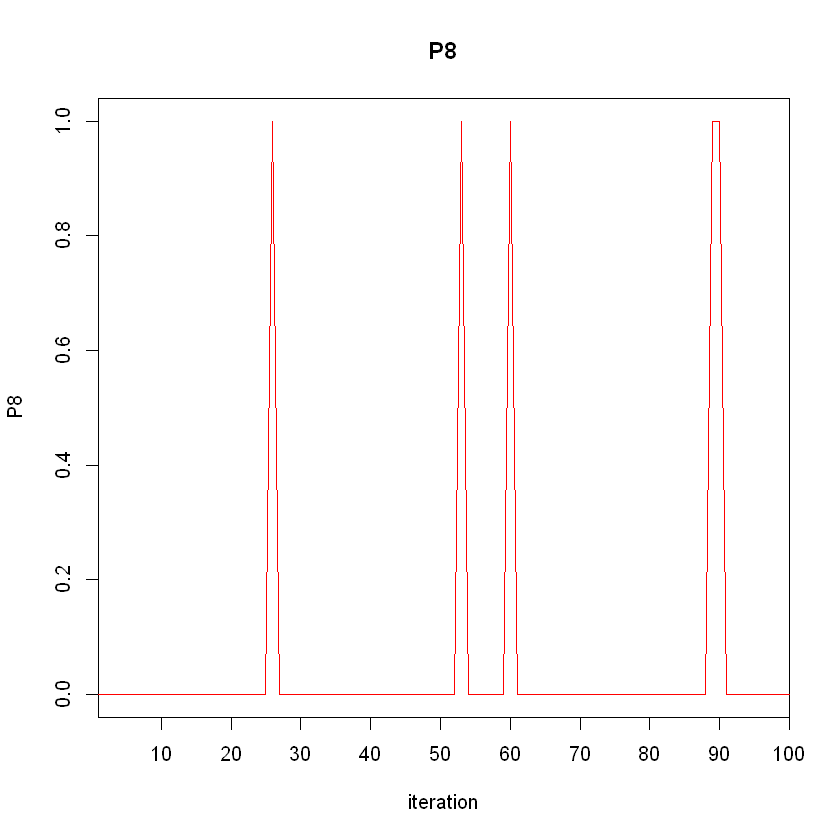

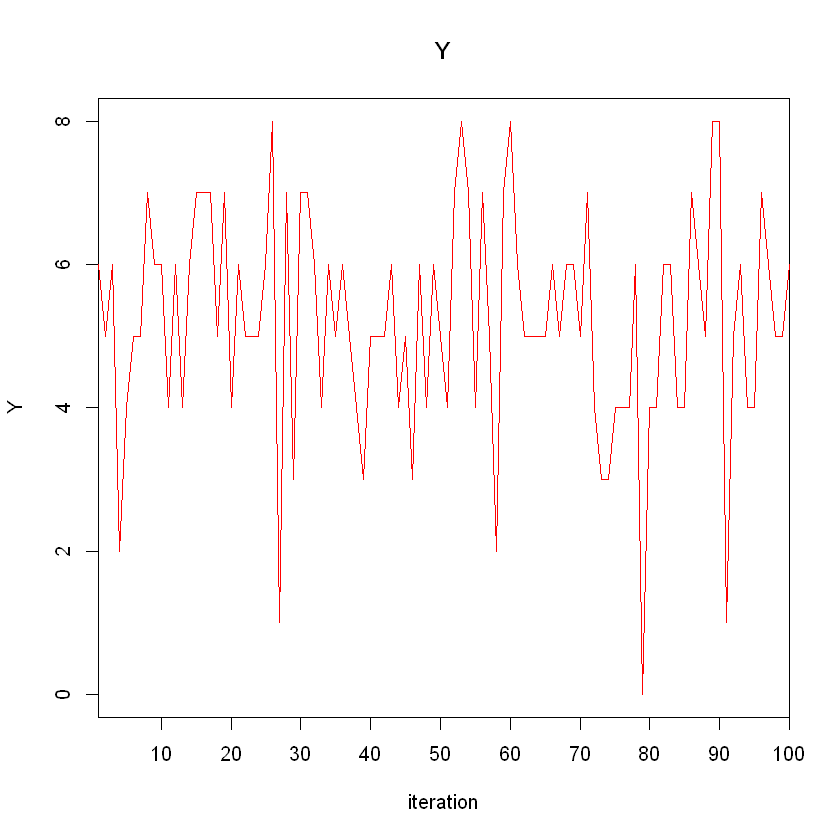

In [5]:
traceplot(jags.mod.fit.coin)

In [6]:
# convert into MCMC object
jagsfit.mcmc.coin <- as.mcmc(jags.mod.fit.coin)
# get numerical summary
summary(jagsfit.mcmc.coin)


Iterations = 1:100
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 100 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

   Mean    SD Naive SE Time-series SE
P8 0.05 0.219   0.0219         0.0258
Y  5.21 1.559   0.1559         0.1559

2. Quantiles for each variable:

    2.5% 25% 50% 75% 97.5%
P8 0.000   0   0   0     1
Y  1.475   4   5   6     8


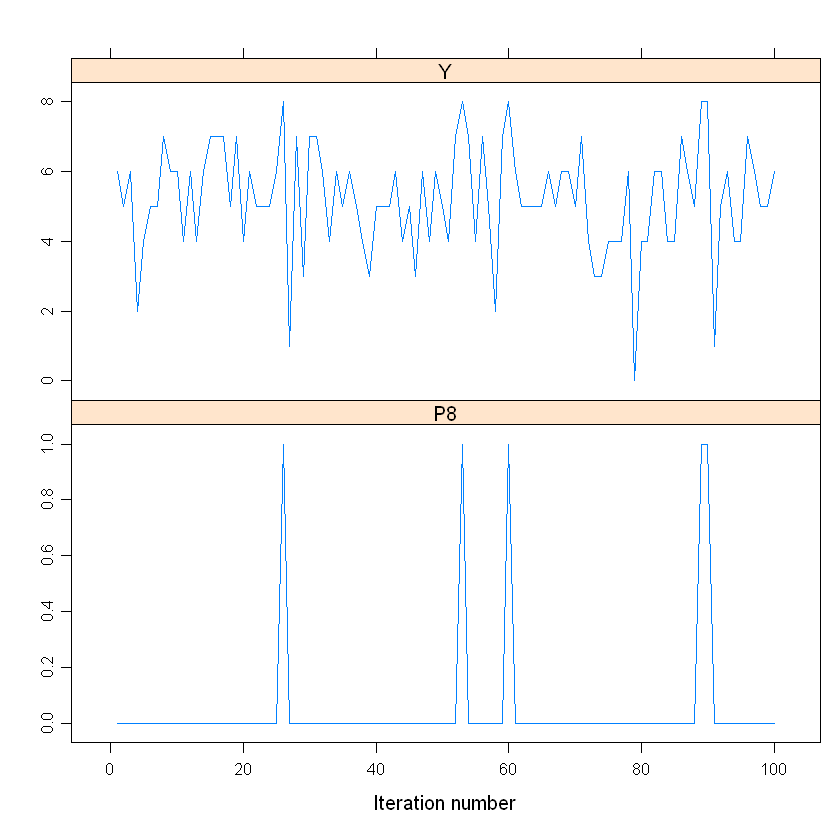

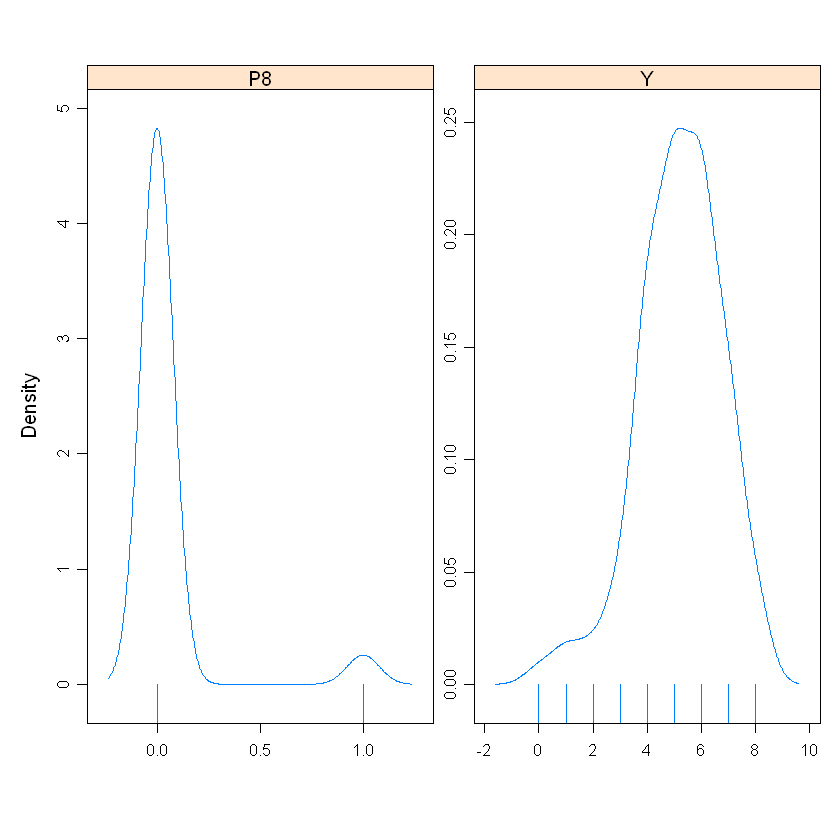

In [7]:
# get traceplots
xyplot(jagsfit.mcmc.coin)
# get density estimate
densityplot(jagsfit.mcmc.coin)